# Algorithmes de descente en optimisation différentiable sans contrainte

Ce TP utilisera les bibliothèques `numpy` et `matplotlib.pyplot` qui sont importées de cette façon:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Ce TP est dédié aux algorithmes de minimisation sans contrainte de fonctions, c'est à dire à la résolution numériques des probèmes de la forme:

$$\min_{x\in\mathbb{R}^n} f(x)$$

Le but de cette séance est de coder une descente de gradient et un algorithme de Newton local et d'évaluer leurs performances sur les fonctions tests suivantes:

- $f_1(x,y) = 2(x+y-2)^2 + (x-y)^2$ pour tout $x,y \in \mathbb{R}$
- $f_2(x,y) = x^4 - x^2 + y^2$ pour tout $x,y \in \mathbb{R}$

## I. Etude des fonctions

Dans un premier temps, nous allons étudier les deux fonctions.
Le code suivant permet d'afficher les graphes des fonctions.

Text(0.5, 0.92, '$f_2$')

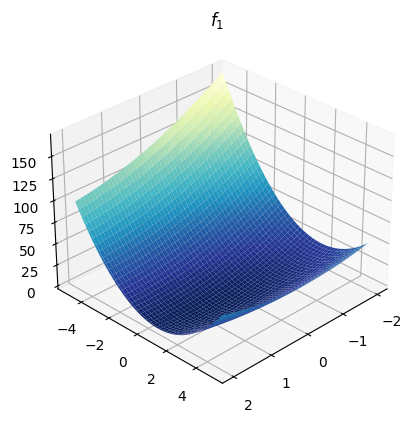

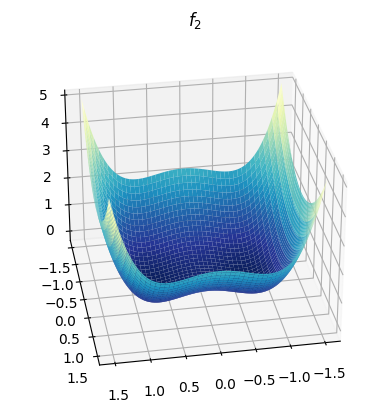

In [5]:
N = 501
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)
X,Y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-5,5,N))
ax.plot_surface(X,Y, 2*(X+Y-2)**2 + (X-Y)**2, cmap=plt.cm.YlGnBu_r)
plt.title('$f_1$')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=80)
X,Y = np.meshgrid(np.linspace(-1.5,1.5,N),np.linspace(-1.5,1.5,N))
ax.plot_surface(X,Y, X**4 - X**2 + Y**2 , cmap=plt.cm.YlGnBu_r)
plt.title('$f_2$')




**Exercice 1:** Calculer les gradients et les Hessiennes des deux fonctions

**Exercice 2:**
1. Donner les points critiques des fonctions proposées.
2. Les fonctions $f_i$ admettent-elles des extrema sur $\mathbb{R}^2$?

## II. Algorithmes de descente

Un algorithme générique de descente possède la forme suivante:

* **Données :**
  * $x_0\in \mathbb{R}^n$ point initial arbitraire
  * une fonction oracle $[f(x),\nabla f(x),H[f](x)]= \textrm{oracle}(x)$
* **Initialisation :** Itération: $k=0$.
* **Tant que** le critère d'arrêt n'est pas satisfait, **faire**
  * Calcul de la direction de descente $d_k$.
  * Choix/Calcul du pas $s_k$.
  * Mise à jour: calcul du prochain itéré $x_{k+1}$.
  * $k = k + 1.$

### 1. Oracles

La fonction $\textit{oracle}$ permet de fournir toutes les informations nécessaires sur la fonction à minimiser à l'algorithme de descente.
A un $x$ donné elle renvoie la valeur $f(x)$ du critère, le gradient $\nabla f(x)$ s'il existe, et éventuellement la matrice Hessienne $H[f](x)$ si elle existe et si nécessaire (algorithme de Newton)

**Exercice 3:** Implémenter les fonctions oracles associées à $f_1$ et $f_2$.

* Les prototypes de ces fonctions sont affichés dans la cellule suivante et doivent être complété.
* En entrée: `x` est un `np.array` de taille `(2,)`
* En sortie:
  * `f` : la valeur de la fonction coût
  * `Df`: un `np.array` de taille `(2,)` contenant le gradient
  * `Hf`: un `np.array` de taille `(2,2)` contenant la matrice Hessienne

In [6]:
def oracle1(x):
    # code
    return f, Df, Hf

def oracle2(x):
    # code
    return f, Df, Hf

**Exercice 4 :** Vérifier les oracles pour quelques $x$


### 2. Descente de gradient

**Exercice 5:** Implémenter l'algorithme de descente de gradient à pas fixe

$$ x_{k+1} = x_k - s \nabla f(x_k) $$


* Le prototype de la fonction est affiché dans la cellule suivante et doit être complété.
* Le critère d'arrêt sera sur la norme du gradient: $\| \nabla f(x) \| < \epsilon $ et un nombre d'itérations maximal
* Les arguments d'entrée:
    *  `function` sera l'oracle associé à la fonction à minimiser
    *  `step` sera le pas de la méthode de gradient
    *  `x_ini` est le point initial
    *  `eps` correspond à $\epsilon$, la précision requise sur la norme du gradient (par défaut: `eps = 1e-10`)
    *  `iter_max` nombre d'itérations max (pas défaut `itermax = 1000`)
* Les arguments de sortie:
  * `x` l'itéré final
  * `x_iter` un tableau de taille (n, itermax) contenant tous les itérés
  * `cf_iter` un tableau de taille (n) contenant les valeurs de la fonction coût à toutes les itérations
  * `err_iter` un tableau de taille (n) contenant la norme du gradient à toutes les itérations
  * `nb_iter` l'itération finale

Les tableaux `x_iter`, `cf_iter` et `err_iter` peuvent être construits sous forme de liste puis convertis en `np.array` à la fin de la fonction

In [8]:
def gradient_descent(function, step, x_ini, eps = 1e-10, iter_max=1000):
    # initialisation des variables
    x = np.copy(x_ini)
    x_iter = [] # liste des itérés
    cf_iter = [] # liste des valeurs de la fonction cout
    err_iter = [] # liste des normes du gradient

    # descente de gradient à coder
    
    # list to array
    x_iter = np.array(x_iter)
    cf_iter = np.array(cf_iter)
    err_iter = np.array(err_iter)
    
    return x, x_iter, cf_iter, err_iter, nb_iter

### 3. Méthode de Newton locale

**Exercice 6:** Implémenter la méthode de Newton locale.

$$ x_{k+1} = x_k - H[f](x_k)^{-1} \nabla f(x_k) $$

* Le prototype de la fonction est affiché dans la cellule suivante et doit être complété.
* Le critère d'arrêt sera sur la norme du gradient: $\| \nabla f(x) \| < \epsilon $ et un nombre d'itérations maximal
* Les arguments d'entrée:
    *  `function` sera l'oracle associé à la fonction à minimiser
    *  `x_ini` est le point initial
    *  `eps` correspond à $\epsilon$, la précision requise sur la norme du gradient (par défaut: `eps = 1e-10`)
    *  `iter_max` nombre d'itérations max (pas défaut `itermax = 1000`)
* Les arguments de sortie:
  * `x` l'itéré final
  * `x_iter` un tableau de taille (n, itermax) contenant tous les itérés
  * `cf_iter` un tableau de taille (n) contenant les valeurs de la fonction coût à toutes les itérations
  * `err_iter` un tableau de taille (n) contenant la norme du gradient à toutes les itérations
  * `nb_iter` l'itération finale

Les tableaux `x_iter`, `cf_iter` et `err_iter` peuvent être construits sous forme de liste puis convertis en `np.array` à la fin de la fonction.

Le calcul de $H[f](x_k)^{-1} \nabla f(x_k)$ pourra se réaliser à l'aide de la fonction `np.linalg.solve`

In [10]:
def newton_descent(function, x_ini, eps = 1e-10, iter_max=1000):
    # initialisation des variables
    x = np.copy(x_ini)
    x_iter = [] # liste des itérés
    cf_iter = [] # liste des valeurs de la fonction cout
    err_iter = [] # liste des normes du gradient

    # descente de newton à coder
    
    # list to array
    x_iter = np.array(x_iter)
    cf_iter = np.array(cf_iter)
    err_iter = np.array(err_iter)
    
    return x, x_iter, cf_iter, err_iter, nb_iter

## III. Evaluation des performances

Dans cette section, les algorithmes de descente seront évalués sur les fonctions $f_1$ $f_2$
Dans ce but, on se propose de :
* représenter la suite des itérés sur les courbes de niveau des fonctions
* suivre la décroissance (en semilogy)
    * de la fontion coût
    * de la norme du gradient

Les fonctions suivantes permettent de tracer les suites des itérés sur les courbes des niveaux des fonctions $f_1$ et $f_2$
Etudier et comprendre leur code.

In [12]:
def plot_iter_f1(x_iter):
    Nx = 1000
    Ny = 1000
    x = np.linspace(-1.5,3.5,Nx)
    y = np.linspace(-1.5,3.5,Ny)
    X, Y = np.meshgrid(x, y)
    Z=2*(X+Y-2)**2+(X-Y)**2 
    CS=plt.contour(X, Y, Z,[0,0.1,1,2,4,6,8,12,16,20,24],colors='k')
    plt.plot(x_iter[:,0], x_iter[:,1],'o-')
    plt.clabel(CS, inline=1, fontsize=10)

def plot_iter_f2(x_iter):
    Nx = 1000
    Ny = 1000
    x = np.linspace(-2,2,Nx)
    y = np.linspace(-2,2,Ny)
    X, Y = np.meshgrid(x, y)
    Z= X**4 - X**2 + Y **2
    CS=plt.contour(X, Y, Z,[0,0.1,0.5,2,5],colors='k')
    plt.plot(x_iter[:,0], x_iter[:,1],'-o')
    plt.clabel(CS, inline=1, fontsize=10)


### 1. Fonction $f_1$

**Exercice 7:** 
Pour $f_1$ tester la descente de gradient pour 
| Points initiaux $x_0$ | Les pas $s$ |
| --- | --- |
| $(1,2)$ | 0.1 |
| $(10,10)$  | 0.1 |
| $(1,2)$ | 0.3 |
| $(1,2)$ | 0.01 |

**Exercice 8:** Pour $f_1$ tester la méthode de Netwon avec les points initiaux $x_0 = (1,2), (10,10^{10})$

### 2. Fonction $f_2$

**Exercice 9:** 
Pour $f_2$ tester la descente de gradient avec 1000 itérations pour 
| Points initiaux $x_0$ | Les pas $s$ |
| ----------------|-------------|
| $(0,0)$ | 0.1 |
| $(0,1.5)$  | 0.01 |
| $(0.01,1.5)$  | 0.1 |
| $(-0.01,1.5)$ | 0.1 |
| $(1,1.5)$ | 0.4|
| $(1,1.5)$ | 0.99 |
| $(1,1.5)$ | 1 |
| $(1,1.5)$ | 1.1 |

**Exercice 10:** 
Pour $f_2$ tester la méthode de Netwon avec les points initiaux $x_0 = (0,1.5), (0.3,1.5), (1,1.5), (10,1000)$

### 3. Discussion

**Exercice 11:**  Discuter des résultats obtenus.